# To Run Before Everything Else

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#%cd '/content/drive/MyDrive/AML_Project/Dataset'
# %ls '/content/drive/MyDrive/AML_Project'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load Dataset

In [5]:
tracks_df = pd.read_csv('Dataset/tracks.csv')
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
artists_df = pd.read_csv('Dataset/artists.csv')
artists_df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


# Data Preprocessing - Chris

The values for attributes artists and id_artists in the tracks dataset have to be reformatted into strings without the brackets and single quotes.

This is done in order to facilitate the merging of the two datasets: artists and tracks.

In [7]:
# reformatting values from the tracks dataframe
artists = tracks_df['artists']
new_artists = artists.str.strip("['")
new_artists = new_artists.str.strip("']")
tracks_df['artists'] = new_artists

artists_id = tracks_df['id_artists']
new_artists_id = artists_id.str.strip("['")
new_artists_id = new_artists_id.str.strip("']")
tracks_df['id_artists'] = new_artists_id

tracks_df.rename(columns={'id_artists': 'id_artists_tracks'}, inplace=True)

In [8]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists_tracks,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [9]:
# merging the 2 dataframes
merged_df = tracks_df.merge(artists_df, how='inner', left_on='id_artists_tracks', right_on='id', suffixes=('_tracks', '_artists'))

# removing duplicated columns
id_artists = merged_df['id_artists']
merged_df = merged_df.drop(columns=['artists', 'id_artists_tracks'])
merged_df['id_artists'] = id_artists

#Get rid of rows with empty genres
merged_df = merged_df[merged_df["genres"] != "[]"]

genres = merged_df['genres']
new_genres = genres.str.strip("['")
new_genres = new_genres.str.strip("']")
merged_df['genres'] = new_genres


merged_df['genres'].value_counts()
# There are 37k cases with empty genres, which counts for 10% of the total observation

hoerspiel                                                                        8027
kleine hoerspiel                                                                 2081
classic italian pop', 'italian adult pop                                         1781
classic israeli pop', 'israeli rock                                              1725
adult standards', 'easy listening', 'lounge                                      1529
                                                                                 ... 
azeri pop', 'azeri traditional', 'ulkucu sarkilar                                   1
house', 'progressive house', 'tech house                                            1
"children's music", 'language                                                       1
turkish alternative rock', 'turkish singer-songwriter                               1
alt z', 'alternative r&b', 'bedroom pop', 'indie cafe pop', 'indie pop', 'pop       1
Name: genres, Length: 18524, dtype: int64

In [10]:
print(len(merged_df))
print(len(artists_df))
print(len(tracks_df))
merged_df.head()

432228
1162095
586672


,id_tracks,name_tracks,popularity_tracks,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,id_artists,followers,genres,name_artists,popularity_artists
56,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,...,0.021800,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23
57,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,...,0.918000,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23
58,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,1922-03-29,0.548,0.0391,6,-23.228,...,0.933000,0.148,0.612,75.595,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23
59,0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,0,153533,0,1922-03-21,0.370,0.3720,2,-17.138,...,0.000681,0.929,0.753,159.669,4,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23
60,0xJCJ9XSNcdTIz0QKmhtEn,La Maleva - Remasterizado,0,181440,0,1922-03-29,0.339,0.0958,8,-26.944,...,0.969000,0.123,0.219,86.279,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23


In [11]:
print(len(merged_df.columns))
merged_df.columns

23


Index(['id_tracks', 'name_tracks', 'popularity_tracks', 'duration_ms',
       'explicit', 'release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'id_artists', 'followers',
       'genres', 'name_artists', 'popularity_artists'],
      dtype='object')

We have 23 columns or features. There are:

- **Numerical features** (16): duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, followers, popularity_artists

- **Categorical features** (4): id_tracks, name_tracks, id_artists, name_artists

- **Date feature** (1): release_date

- **Other feature** (1): genres (array of genres for that artist)
- **Target**: popularity_tracks


## Initial Data Exploration

In [12]:
num_features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key',
                'loudness', 'mode', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo',
                'time_signature', 'followers', 'popularity_artists']
cat_features = ['id_tracks', 'name_tracks', 'id_artists', 'name_artists']
date_feature = ['release_date']
other_feature = ['genres']
target = ['popularity_tracks']

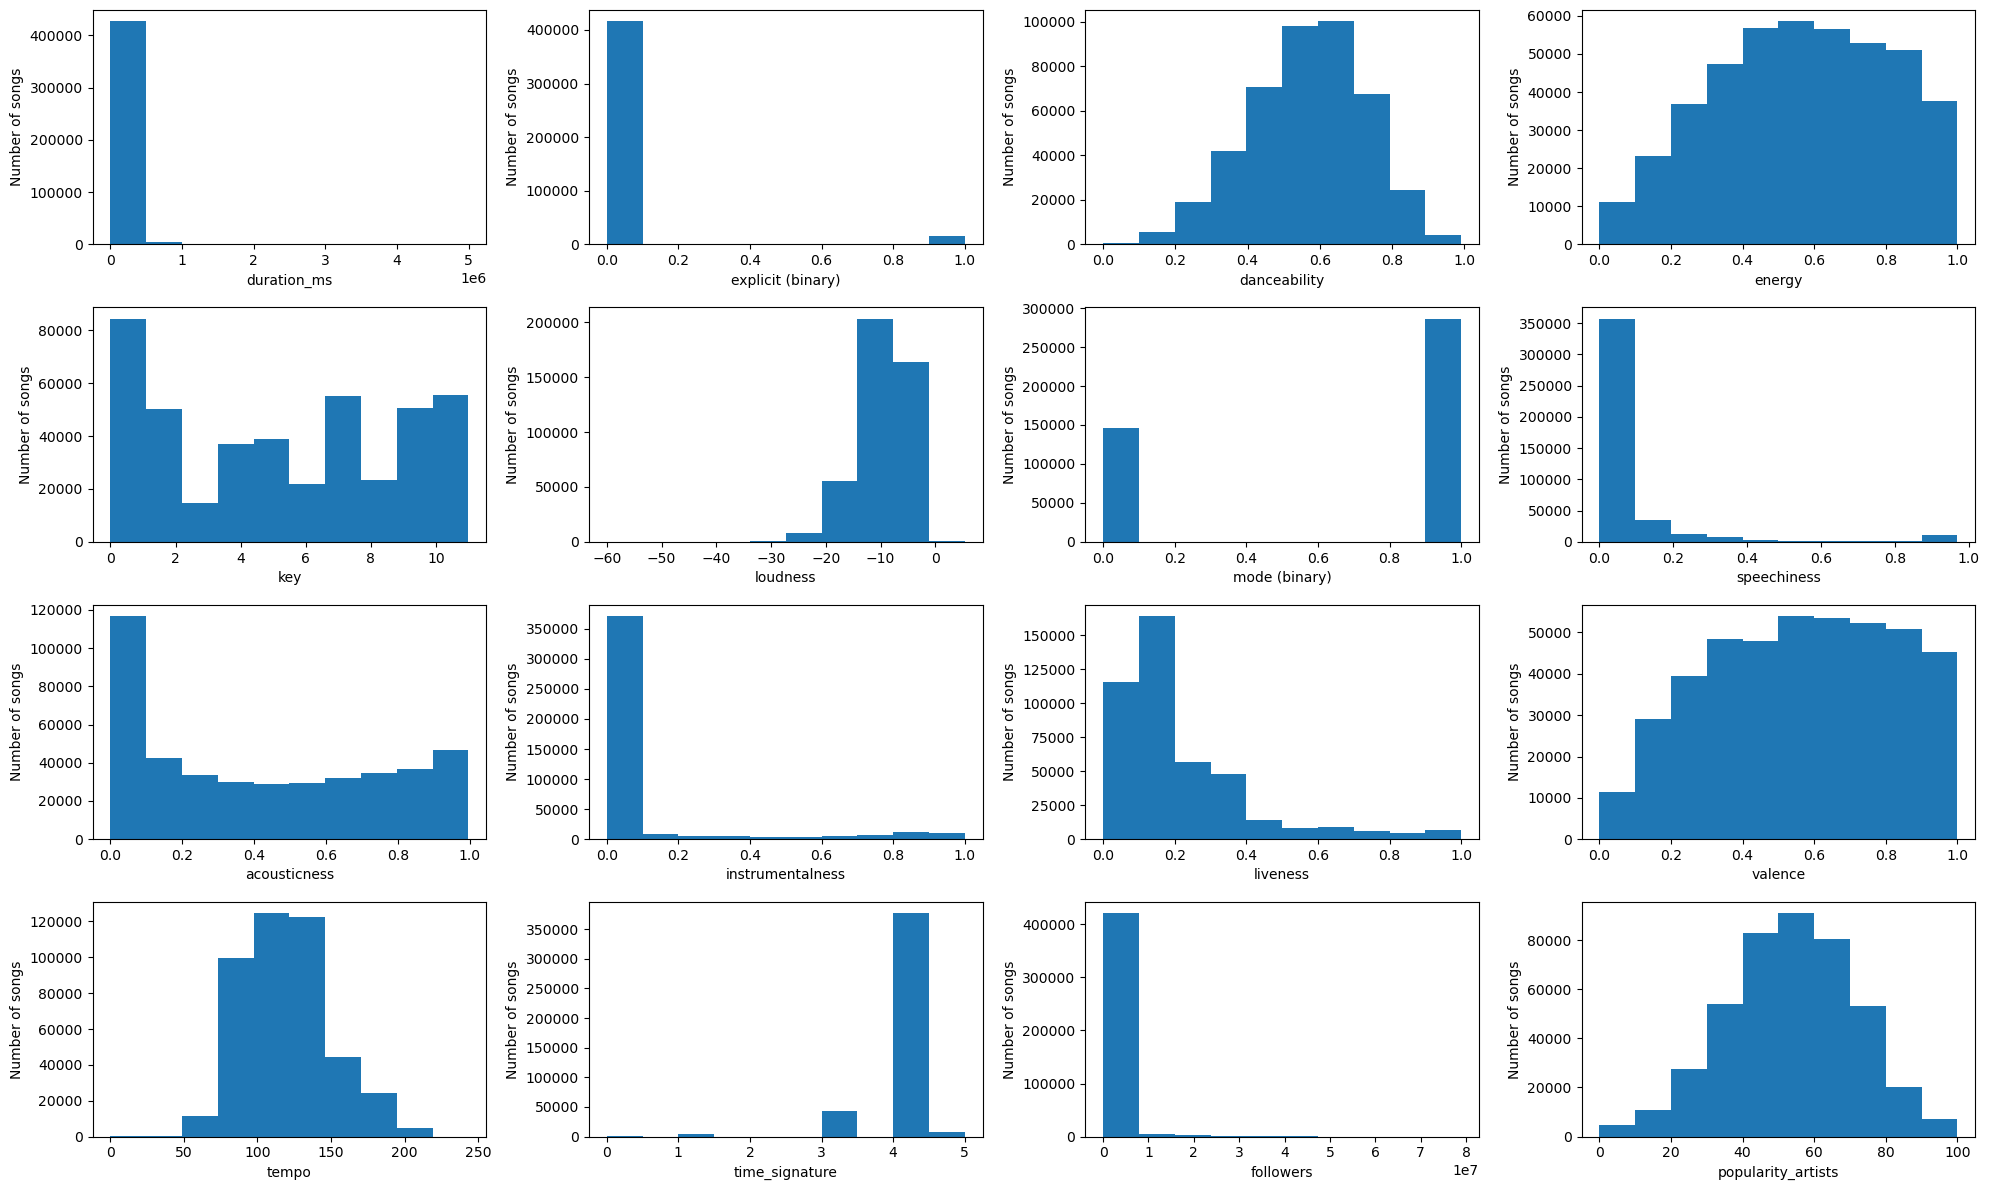

In [13]:
### Histograms for the numerical features
# fig = plt.figure(tight_layout=True)
fig = plt.figure(tight_layout=True, figsize=(20, 12))
count = 0

for feature in num_features:
  count += 1

  ax = fig.add_subplot(4, 4, count)
  ax.hist(merged_df[feature])
  ax.set_ylabel('Number of songs')
  if merged_df[feature].nunique() == 2:
    ax.set_xlabel(feature + " (binary)")
  else:
    ax.set_xlabel(feature)
    
plt.savefig('summary_plot.png')

From the histograms above, we notice that some features:
- follow a normal distribution: danceability, energy, valence, tempo, and popularity_artists.
- are highly skewed to the left or right: loudness, speechiness, acousticness (more or less), instrumentalness, liveness, followers, time_signature (more or less).
- some features are binary: explicit, mode
- some features may have a random distribution: key
- some features have very high values and need to be represented using a logarithmic scale: followers

name_artists    10.015015
dtype: float64


Text(0, 0.5, 'counts')

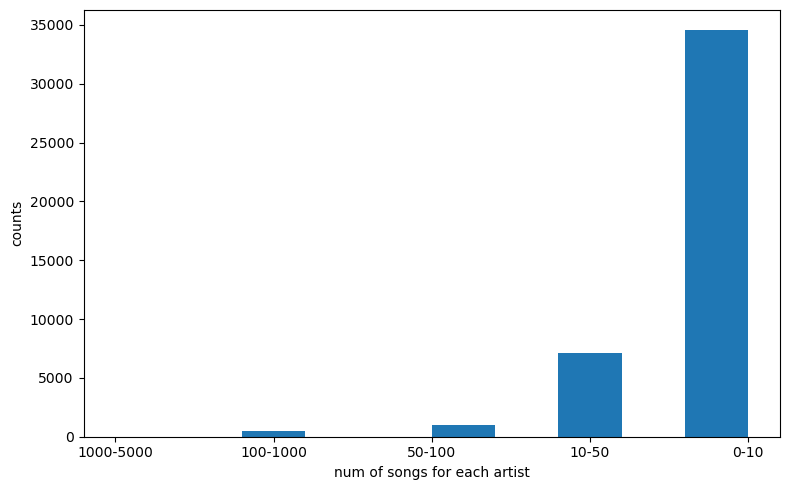

In [14]:
artist_tracks = pd.DataFrame(merged_df.name_artists.value_counts())
print(artist_tracks.mean())
bins = [0,10,50,100,1000,5000]
category = ['0-10', '10-50', '50-100','100-1000','1000-5000']
artist_tracks['num_songs'] = pd.cut(artist_tracks['name_artists'], bins, labels = category)
fig = plt.figure(tight_layout=True, figsize=(8, 5))
ax = fig.add_subplot()
ax.hist(artist_tracks['num_songs'])
ax.set_xlabel('num of songs for each artist')
ax.set_ylabel('counts')

In [15]:
artist_tracks[artist_tracks.name_artists >= 100]
#merged_df = merged_df.merge(artist_tracks[artist_tracks.name_artists >= 100], how= 'inner', right_index= True, left_on= 'name_artists')

,name_artists,num_songs
Die drei ???,3856,1000-5000
TKKG Retro-Archiv,2006,1000-5000
Benjamin Blümchen,1503,1000-5000
Bibi Blocksberg,1472,1000-5000
Lata Mangeshkar,1373,1000-5000
...,...,...
Giannis Parios,100,50-100
A-Mei Chang,100,50-100
Sonny Boy Williamson I,100,50-100
Hibari Misora,100,50-100


In [16]:
#merged_df['popularity_tracks'].replace(to_replace = 0, value= 1, inplace=True)
#merged_df['popularity_tracks'] = np.log(merged_df['popularity_tracks'])

<AxesSubplot:xlabel='popularity_tracks', ylabel='Count'>

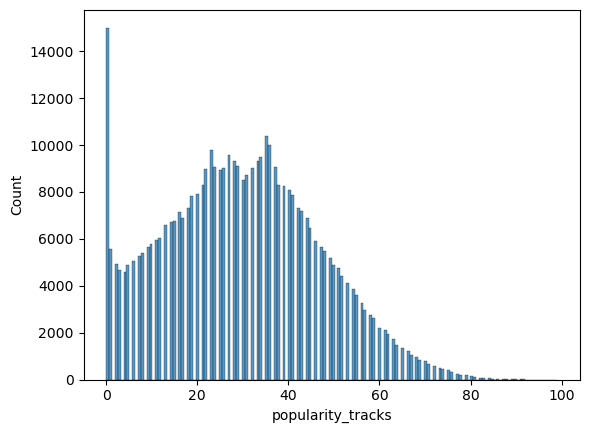

In [17]:
sns.histplot(merged_df['popularity_tracks'])

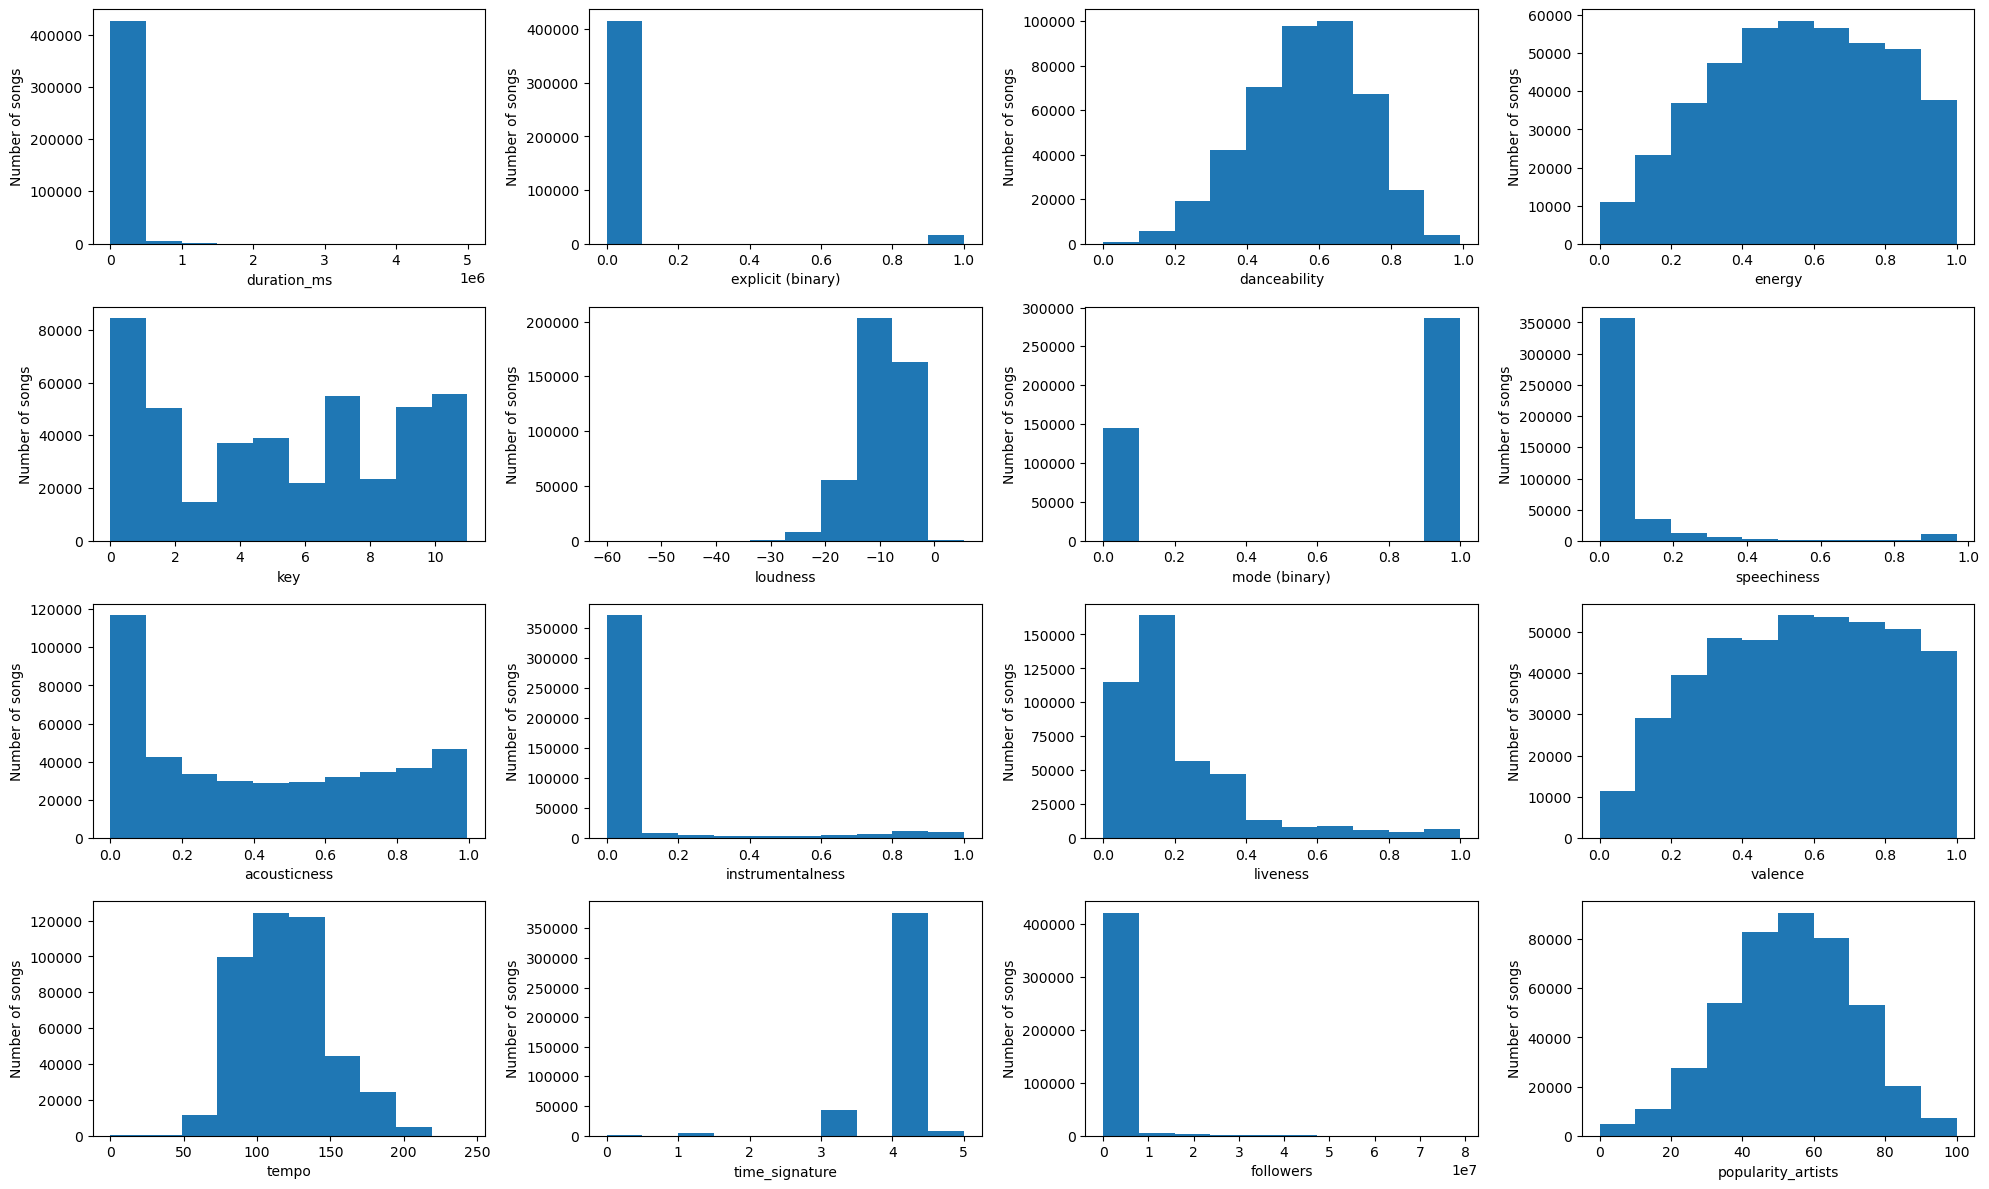

In [18]:
### Histograms for the numerical features
# fig = plt.figure(tight_layout=True)
fig = plt.figure(tight_layout=True, figsize=(20, 12))
count = 0

for feature in num_features:
  count += 1

  ax = fig.add_subplot(4, 4, count)
  ax.hist(merged_df[feature])
  ax.set_ylabel('Number of songs')
  if merged_df[feature].nunique() == 2:
    ax.set_xlabel(feature + " (binary)")
  else:
    ax.set_xlabel(feature)

# Cleaning and Sampling

In [19]:
merged_df[num_features]

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
56,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.457,130.418,5,3528.0,23
57,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.397,169.980,3,3528.0,23
58,181173,0,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.612,75.595,3,3528.0,23
59,153533,0,0.370,0.3720,2,-17.138,1,0.0865,0.985,0.000681,0.9290,0.753,159.669,4,3528.0,23
60,181440,0,0.339,0.0958,8,-26.944,1,0.0530,0.994,0.969000,0.1230,0.219,86.279,3,3528.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,265846,0,0.528,0.6730,4,-3.639,1,0.0314,0.143,0.000000,0.0989,0.297,130.066,4,929.0,36
470034,82500,0,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.890,68.619,4,23.0,52
470035,185250,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.386,63.696,3,91.0,55
470036,258267,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.211,131.896,4,896.0,38


In [20]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
merged_df['year'] = merged_df['release_date'].dt.isocalendar().year
merged_df['month'] = merged_df['release_date'].dt.month
merged_df['day'] = merged_df['release_date'].dt.day
merged_df['dayofweek'] = merged_df['release_date'].dt.dayofweek
merged_df['weekofyear'] = merged_df['release_date'].dt.weekofyear
merged_df = merged_df.drop('release_date', axis=1)

C:\Users\XMhua\AppData\Local\Temp\ipykernel_1956\1015677203.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged_df['weekofyear'] = merged_df['release_date'].dt.weekofyear


In [21]:
# remove outliers in liveness and speechiness
merged_df["duration_ms_log"] = np.log(merged_df["duration_ms"])
q75,q25 = merged_df["duration_ms_log"].describe()["75%"], merged_df["duration_ms_log"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df_clean = merged_df[(merged_df["duration_ms"] >= min) | (merged_df["duration_ms"] <= max)]
df_clean.drop(labels = ['duration_ms'], axis = 1, inplace= True)

q75,q25 = merged_df["liveness"].describe()["75%"], merged_df["liveness"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df_clean = df_clean[(df_clean["liveness"] >= min) | (df_clean["liveness"] <= max)]

q75,q25 = merged_df["speechiness"].describe()["75%"], merged_df["speechiness"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df_clean = df_clean[(df_clean["speechiness"] >= min) | (df_clean["speechiness"] <= max)]


In [22]:
df_clean.columns
#len(df_clean)
df_clean.to_csv("Dataset/clean_df.csv")

In [32]:
df_clean

,id_tracks,name_tracks,popularity_tracks,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,id_artists,followers,genres,name_artists,popularity_artists,year,month,day,dayofweek,weekofyear,duration_ms_log
56,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23,1922,3,21,1,12,12.109782
57,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23,1922,3,21,1,12,12.083379
58,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,0,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.612,75.595,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23,1922,3,29,2,13,12.107208
59,0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,0,0,0.370,0.3720,2,-17.138,1,0.0865,0.985,0.000681,0.9290,0.753,159.669,4,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23,1922,3,21,1,12,11.941671
60,0xJCJ9XSNcdTIz0QKmhtEn,La Maleva - Remasterizado,0,0,0.339,0.0958,8,-26.944,1,0.0530,0.994,0.969000,0.1230,0.219,86.279,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"tango', 'vintage tango",Ignacio Corsini,23,1922,3,29,2,13,12.108680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,0,0.528,0.6730,4,-3.639,1,0.0314,0.143,0.000000,0.0989,0.297,130.066,4,5VGgFE9nPgMfEnYiPT5J2B,929.0,chinese viral pop,芝麻,36,2020,2,25,1,9,12.490672
470034,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,0,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.890,68.619,4,7vgGpuiXdNlCmc994PlMlz,23.0,instrumental lullaby,Laureen Conrad,52,2020,10,30,4,44,11.320554
470035,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.386,63.696,3,4MxqhahGRT4BPz1PilXGeu,91.0,instrumental lullaby,Gregory Oberle,55,2020,3,20,4,12,12.129462
470036,5rgu12WBIHQtvej2MdHSH0,云与海,50,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.211,131.896,4,1QLBXKM5GCpyQQSVMNZqrZ,896.0,chinese viral pop,阿YueYue,38,2020,9,26,5,39,12.461749


In [31]:
duplicate_rows = df_clean.duplicated(keep=False, subset=["name_tracks","name_artists"])
pd.set_option('display.max_columns', None)
df_clean[duplicate_rows].sort_values(by=["name_tracks","name_artists"])

,id_tracks,name_tracks,popularity_tracks,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,id_artists,followers,genres,name_artists,popularity_artists,year,month,day,dayofweek,weekofyear,duration_ms_log
147610,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",37,0,0.371,0.545,8,-9.315,1,0.0307,0.18500,0.582000,0.1830,0.310,150.316,4,51Blml2LZPmy7TTiAg47vQ,8157894.0,"irish rock', 'permanent wave', 'rock",U2,82,1983,2,28,0,9,11.968240
147611,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",38,0,0.371,0.545,8,-9.315,1,0.0307,0.18500,0.582000,0.1830,0.310,150.316,4,51Blml2LZPmy7TTiAg47vQ,8157894.0,"irish rock', 'permanent wave', 'rock",U2,82,1983,2,28,0,9,11.968240
100832,219mhOHU549RFxhslnK52m,"""Móvil"" Oil Special",27,0,0.544,0.629,10,-11.324,1,0.1770,0.86700,0.000006,0.3470,0.586,108.040,4,440MEFxEmF9othCXbz3Y6a,240877.0,"cantautor', 'musica andina', 'nueva cancion', ...",Victor Jara,50,1969,6,5,3,23,12.030731
100874,2YXWZExoI7WStafF4vNVZs,"""Móvil"" Oil Special",14,0,0.550,0.652,10,-11.346,1,0.1880,0.86800,0.000003,0.3300,0.621,109.898,4,440MEFxEmF9othCXbz3Y6a,240877.0,"cantautor', 'musica andina', 'nueva cancion', ...",Victor Jara,50,1969,1,1,2,1,12.030927
248029,3rG8ZkmKHb4Ms6CsSzEITv,"""The Take Over, The Breaks Over""",59,0,0.609,0.917,9,-2.563,1,0.0477,0.00614,0.000020,0.0775,0.670,149.948,4,4UXqAaa6dQYAk18Lv7PEgX,8743699.0,"emo', 'modern rock', 'pop punk",Fall Out Boy,83,2007,1,1,0,1,12.271800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266021,1cKxbdfl0lytWFFMXsoCEA,내 머리가 나빠서,50,0,0.743,0.660,11,-5.223,0,0.0341,0.25100,0.000000,0.0995,0.572,112.967,4,6rmMpoeu2SIV4OLURCOn2e,158646.0,"k-pop', 'k-pop boy group",SS501,53,2011,10,13,3,41,12.480061
278879,0GU5GuJQQEnnREO2FxnVPT,달라달라 (DALLA DALLA),72,0,0.790,0.853,11,-4.564,0,0.0665,0.00116,0.000042,0.3290,0.713,124.998,4,2KC9Qb60EaY0kW4eH68vr3,1844093.0,k-pop girl group,ITZY,74,2019,2,12,1,7,12.205442
278881,5JA4q7xkeSxmhgfAkPWnWW,달라달라 (DALLA DALLA),55,0,0.790,0.853,11,-4.564,0,0.0666,0.00116,0.000042,0.3290,0.713,125.000,4,2KC9Qb60EaY0kW4eH68vr3,1844093.0,k-pop girl group,ITZY,74,2019,2,12,1,7,12.205442
382468,6PHctRrk4oCNORizN1TEbe,죽어도 못 보내,46,0,0.574,0.772,2,-3.093,1,0.0300,0.20700,0.000000,0.1510,0.543,136.857,4,5SnaL8SsjGMHQNyqpa8Zos,147326.0,"k-pop', 'korean pop",2AM,43,2010,3,16,1,11,12.185395


# Insights From Data Exploration

# K means clustering algorithm

In [46]:
features = ['duration_ms_log', 'explicit', 'danceability', 'energy', 'key',
                'loudness', 'mode', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo',
                'time_signature', 'followers', 'popularity_artists', 'year', 'month', 'day', 'dayofweek', 'weekofyear']
df_num = df_clean[features]
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)
df_num

array([[-0.38556278, -0.19544442, -0.8237641 , ...,  1.26370394,
        -0.89070373, -0.67197907],
       [-0.45290459, -0.19544442, -1.53498506, ...,  1.26370394,
        -0.89070373, -0.67197907],
       [-0.39212882, -0.19544442, -0.10624914, ...,  2.08256463,
        -0.37318814, -0.6226714 ],
       ...,
       [-0.33536846, -0.19544442, -0.01813327, ...,  1.16134635,
         0.66184304, -0.67197907],
       [ 0.51215826, -0.19544442, -0.03072125, ...,  1.77549187,
         1.17935863,  0.65932783],
       [-0.81833415, -0.19544442,  1.25954687, ...,  1.26370394,
        -0.37318814,  0.85655848]])